In [2]:
import numpy as nd
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [3]:
# Returns wether PC os is linux or other
def isLinux():
    return os.name == 'posix'

In [120]:
df = pd.read_csv('/home/pves/Documentos/Workspace/heart_attack_analysis/data/ensaio_cTn.csv')
df.head()

,Potencial (V),Negativo,"0,6 ng. mL-1","1,0 ng. mL-1","1,2 ng. mL-1","2,0 ng. mL-1","2,5 ng. mL-1","4,0 ng. mL-1","5,0 ng. mL-1","10,0 ng. mL-1","20,0 ng. mL-1"
0,"-0,499957","-63,0672","-67,3355","-62,5753","-65,6654","-70,7378","-68,2392","-62,1216","-75,0561","-77,0689","-83,8628"
1,"-0,497961","-59,9742","-64,0446","-59,472","-62,2878","-67,6453","-64,9601","-59,0597","-71,8142","-73,8081","-80,5534"
2,"-0,495964","-57,7224","-61,7063","-57,2657","-59,937","-65,2941","-62,5352","-56,8409","-69,3892","-71,3399","-78,0169"
3,"-0,493968","-56,0274","-59,9742","-55,5563","-58,1183","-63,5208","-60,7165","-55,1645","-67,5087","-69,4284","-75,9858"
4,"-0,491971","-54,6417","-58,5761","-54,1334","-56,6584","-62,0568","-59,1947","-53,8035","-65,9251","-67,8304","-74,2486"


In [121]:
potencial = df.iloc[:,0].values
currents = df.iloc[:,1:].values

In [88]:
# Transformando os valores para float
def to_float(array):
    array_out = nd.zeros(shape = array.shape)
    for i in range(array.shape[0]):
        v = array[i].replace(',', '.')
        array_out[i] = float(v)
    return array_out

In [122]:
potencial = to_float(potencial)

for i in range(currents.shape[1]):
    currents[:,i] = to_float(currents[:,i]).astype(float)

In [123]:
def min_max_norm(array):
    out = np.zeros(shape = array.shape)
    min_v = nd.min(array)
    max_v = nd.max(array)
    out = (array - min_v) / (max_v - min_v)
    print(f"Min: {np.min(out)} Max: {np.max(out)}")
    return out

In [124]:
# Tools
def tabulate(x, y, f):
    """Return a table of f(x, y). Useful for the Gram-like operations."""
    return nd.vectorize(f)(*nd.meshgrid(x, y, sparse=True))

def cos_sum(a, b):
    """To work with tabulate."""
    return(math.cos(a+b))

def sin_diff(a, b):
    return (math.sin(a - b))

def identity(a,b):
    return a

In [125]:
potencial = min_max_norm(potencial)


for i in range(currents.shape[1]):
    currents[:,i] = min_max_norm(currents[:,i])

Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0
Min: 0.0 Max: 1.0


In [126]:
# Polar encoding
c0 = currents[:,0].astype(float)
phi = nd.arccos(c0)
# Note! The computation of r is not necessary
r = nd.linspace(0, 1, len(potencial))

In [127]:
# GAF Computation (every term of the matrix)
gaf = tabulate(phi, phi, cos_sum)
gdf = tabulate(phi, phi, sin_diff)
r_vec = tabulate(r, r, identity)

In [136]:
def calculate_gramian_transform(array, r):
    phi = np.arccos(array.astype(float))
    gaf = tabulate(phi, phi, cos_sum)
    gdf = tabulate(phi, phi, sin_diff)
    r_vec = tabulate(r, r, identity)
    image = np.zeros(shape = (gaf.shape[0], gaf.shape[1], 3))
    image[:,:,0] = gaf
    image[:,:,1] = gdf
    image[:,:,2] = r
    return image

In [130]:
print(gaf.shape)
print(gdf.shape)
print(r_vec.shape)

(1503, 1503)
(1503, 1503)
(1503, 1503)


In [131]:
print(gaf.max())
print(gdf.max())
print(r_vec.max())

1.0
1.0
1.0


In [132]:
print(gaf.min())
print(gdf.min())
print(r_vec.min())

-1.0
-1.0
0.0


In [133]:
def show_result(gaf, gdf, r):
    image = np.zeros(shape = (gaf.shape[0], gaf.shape[1], 3))
    image[:,:,0] = gaf
    image[:,:,1] = gdf
    image[:,:,2] = r
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


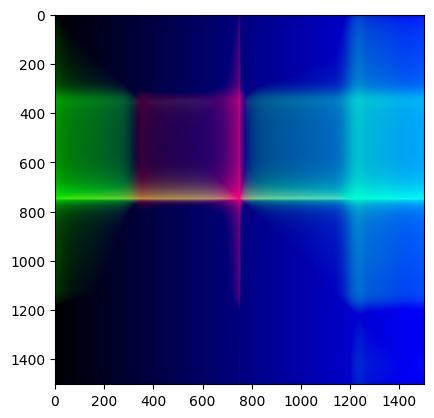

In [134]:
plt.imshow(show_result(gaf, gdf, r_vec))

0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


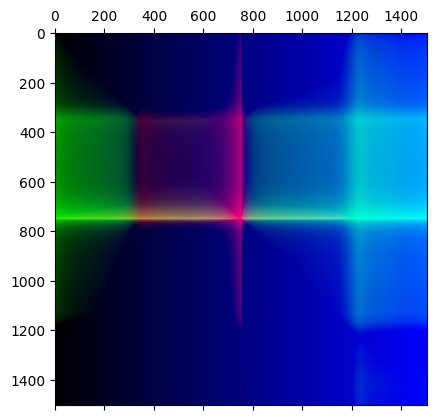

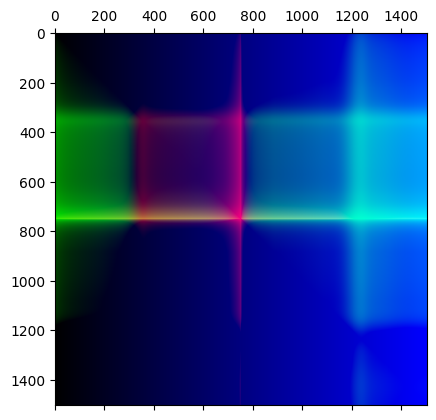

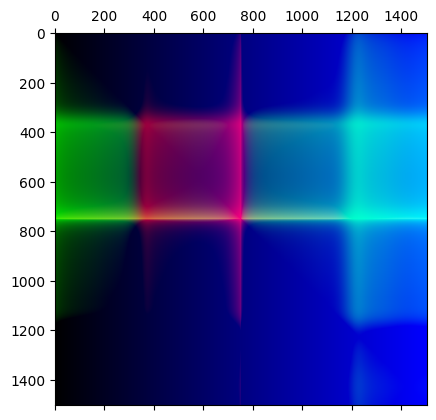

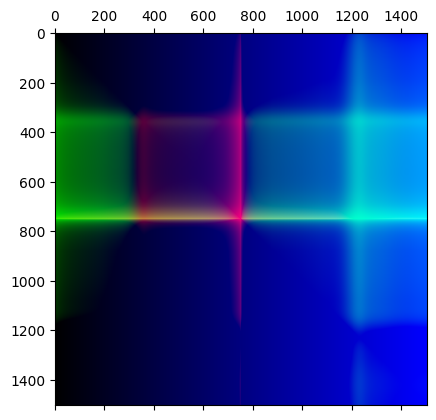

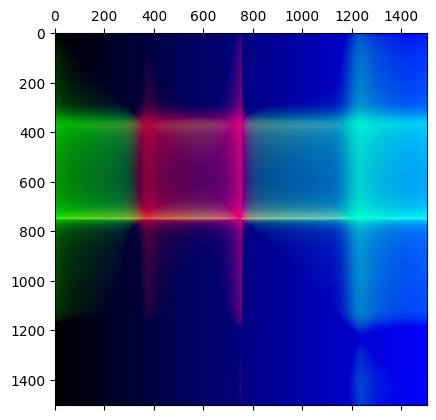

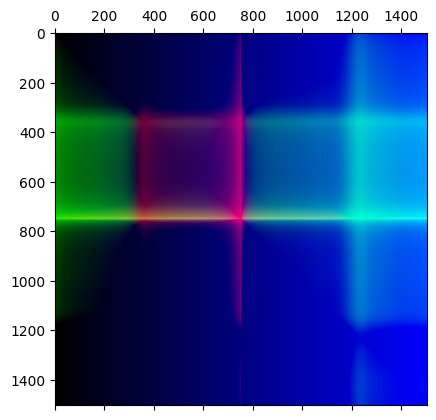

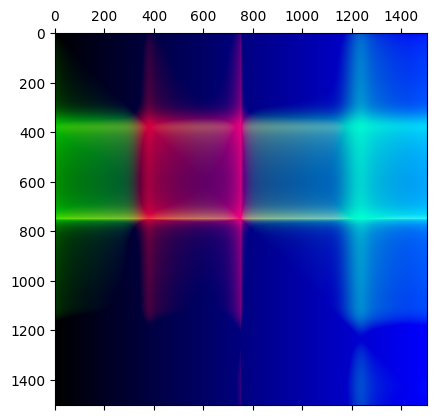

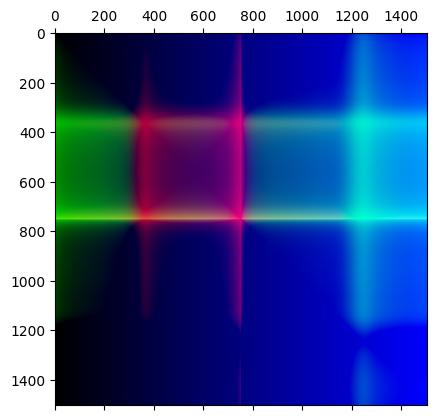

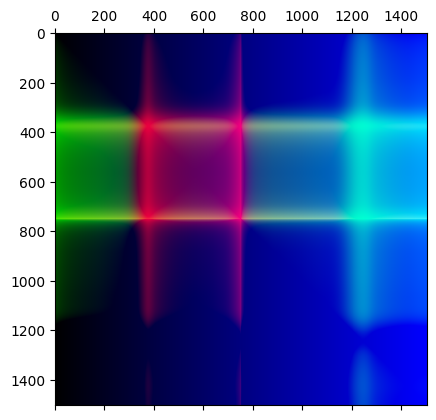

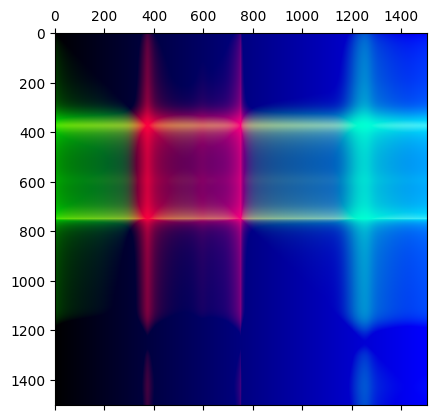

In [137]:
for c in range(currents.shape[1]):
    print(c)
    plt.matshow(calculate_gramian_transform(currents[:,c], r))